# Data Methods for Health Research

## Candidate Number: BXFK0

#### Importing Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

## Assignment A

#### Introduction

The aim of this assignment is to analyze datasets obtained from the NHS Digital Database to review the GP prescribing costs in April 2018.

For this assignment, information from the following datasets obtained from the NHS Digital Database will be used:
1. Practice Prescribing Data File
2. GP Prescribing Chemical Substance File
3. Totals (GP Practice - All Persons)

#### Exploring Data Sets

These 3 data files will be imported as Data Frames as shown below:

1. Practice Prescribing Data File

In [4]:
# To import 'Practice Prescribing Data File'
PrescribingData_ColumnLabels = ['Strategic Health Authority', 'Clinical Commissioning Group', 'Practice_Codes', 'BNF_Codes', 'Drug_Names', 'Number of Items', 'Net Ingredient Cost', 'Actual Cost', 'Quantity', 'Processing Date']
PrescribingData_Apr2018 = pd.read_csv('/Users/Desktop/DMHR/GPDataset/PrescribingData.CSV', skiprows=1, names=PrescribingData_ColumnLabels, index_col=False)
PrescribingData_Apr2018

,Strategic Health Authority,Clinical Commissioning Group,Practice_Codes,BNF_Codes,Drug_Names,Number of Items,Net Ingredient Cost,Actual Cost,Quantity,Processing Date
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804
5,Q44,RTV,Y04937,0402010ADAAABAB,Aripiprazole_Tab 15mg,1,1.61,1.61,14,201804
6,Q44,RTV,Y04937,0402010D0AAAIAI,Chlorpromazine HCl_Tab 25mg,1,18.57,17.33,14,201804
7,Q44,RTV,Y04937,040201060AAACAC,Olanzapine_Tab 10mg,1,18.98,17.61,28,201804
8,Q44,RTV,Y04937,0402030Q0BBABAB,Depakote_Tab G/R 500mg,1,21.22,19.79,56,201804
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804


In [3]:
PrescribingData_Apr2018.count()

Strategic Health Authority      9748354
Clinical Commissioning Group    9748354
Practice_Codes                  9748354
BNF_Codes                       9748354
Drug_Names                      9748354
Number of Items                 9748354
Net Ingredient Cost             9748354
Actual Cost                     9748354
Quantity                        9748354
Processing Date                 9748354
dtype: int64

2. GP Prescribing Chemical Substance File

In [5]:
# To import 'GP Prescribing Chemical Substance File'
Chemicals_ColumnLabels = ['Chemical Substance Codes', 'Chemical Names']
Chemicals = pd.read_csv('/Users/Desktop/DMHR/GPDataset/ChemicalNames.CSV', skiprows=1, names=Chemicals_ColumnLabels, index_col=False).rename(columns=lambda F: F.strip())
Chemicals.head(3)

,Chemical Substance Codes,Chemical Names
0,0101010A0,Alexitol Sodium ...
1,0101010B0,Almasilate ...
2,0101010C0,Aluminium Hydroxide ...


As there was some white space in the column headings of the ‘GP Prescribing Chemical Substance File’, the ‘.rename(columns=lambda x:x.strip( ))’ method was used to strip out the unwanted white space from the column headings of the DataFrame to improve the presentation and layout of the table.

In [6]:
Chemicals.count()

Chemical Substance Codes    3496
Chemical Names              3496
dtype: int64

3. Totals (GP Practice - All Persons)

In [7]:
# To import 'Totals (GP Practice - All Persons) Data File'
TotalPatients_ColumnLabels = ['Publication', 'Extract Date', 'Type', 'CCG Code', 'ONS_CCG_Code', 'Practice_Codes', 'Postal Code', 'Sex', 'Age', 'Number of Patients']
TotalPatients_Apr2018 = pd.read_csv('/Users/Desktop/DMHR/GPDataset/GPAllPersons.csv', skiprows=1, names=TotalPatients_ColumnLabels, index_col=False)
TotalPatients_Apr2018.head(3)

,Publication,Extract Date,Type,CCG Code,ONS_CCG_Code,Practice_Codes,Postal Code,Sex,Age,Number of Patients
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070


In [8]:
TotalPatients_Apr2018.count()

Publication           7241
Extract Date          7241
Type                  7241
CCG Code              7241
ONS_CCG_Code          7241
Practice_Codes        7241
Postal Code           7241
Sex                   7241
Age                   7241
Number of Patients    7241
dtype: int64

### Question 1

#### - The total number of patients registered at a GP Practice in London

In [10]:
Patients_London = TotalPatients_Apr2018[TotalPatients_Apr2018['CCG Code'].str.match('09A|08[A-Y]|07[L-Y]')].copy(deep=True)
TotalPatients_London = Patients_London['Number of Patients'].sum()
print('In April 2018, the total number of patients registered at GP practices located in London was %d.' % TotalPatients_London)

In April 2018, the total number of patients registered at GP practices located in London was 9851208.


#### - The total number of prescriptions in London

In [11]:
Prescriptions_London = PrescribingData_Apr2018[PrescribingData_Apr2018['Practice_Codes'].isin(Patients_London['Practice_Codes'])].copy(deep=True)
TotalPrescriptions_London = Prescriptions_London['Number of Items'].sum()
print('In April 2018, a total of %d prescriptions were made in London.' % TotalPrescriptions_London)

In April 2018, a total of 10416926 prescriptions were made in London.


#### - The total actual cost of these prescriptions in London (using the ACT COST column)

In [12]:
TotalCost_London = Prescriptions_London['Actual Cost'].sum()
print('In April 2018, the total actual cost of the prescriptions in London was £%.2f.' % TotalCost_London)

In April 2018, the total actual cost of the prescriptions in London was £76586738.71.


#### - The top 10 most frequent drugs prescribed in London

In [13]:
AllDrugs_London = pd.DataFrame(Prescriptions_London.groupby(Prescriptions_London.Drug_Names).apply(lambda F0: F0['Number of Items'].sum()))
AllDrugs_London.columns = ['Total Number of Items']
AllDrugs_London.reset_index(inplace=True)
print('The top 10 most frequently prescribed drugs in London are as follows:')
AllDrugs_London.sort_values(by=['Total Number of Items'], ascending=False).iloc[:10,:]

The top 10 most frequently prescribed drugs in London are as follows:


,Drug_Names,Total Number of Items
9237,Omeprazole_Cap E/C 20mg,239181
8206,Metformin HCl_Tab 500mg,208077
705,Amlodipine_Tab 5mg,198244
997,Atorvastatin_Tab 20mg,182749
969,Aspirin Disper_Tab 75mg,168671
704,Amlodipine_Tab 10mg,155573
999,Atorvastatin_Tab 40mg,152003
7202,Lansoprazole_Cap 30mg (E/C Gran),149520
11008,Salbutamol_Inha 100mcg (200 D) CFF,140534
9651,Paracet_Tab 500mg,123526


#### - The bottom 10 less frequent drugs prescribed in London

In [14]:
print('The 10 least frequently prescribed drugs in London are as follows:')
AllDrugs_London.sort_values(by=['Total Number of Items']).iloc[:10, :]

The 10 least frequently prescribed drugs in London are as follows:


,Drug_Names,Total Number of Items
13699,varicase Class 2 Thigh Open Toe Slc Band,1
7082,KytoCel 10cm x 10cm Wound Dress Protease,1
7076,Konakion MM_I/V Inj 10mg/ml 1ml Amp,1
7072,KoCarbon Occlusive 4cmx6.4cm Wound Dress,1
7069,Knit-Band 15cm x 4m Ktd Polyam & Cellulo,1
7065,Kliniderm fiber cmc 5cm x 5cm Wound Dres,1
7058,Kliniderm Foam Slc Border 10cm x 30cm Wo,1
7039,Ketoconazole_Tab 200mg,1
7034,KetoClassic 3:1_Meal Pouch 135g (Chkn),1
7025,Ketamine_Inj 10mg/ml 20ml Vl,1


In [15]:
len(AllDrugs_London[AllDrugs_London['Total Number of Items'] == 1])

2155

### Question 2

#### - The total number of patients registered at a GP Practice in Cambridge

In [16]:
Patients_Cambridge = TotalPatients_Apr2018[(TotalPatients_Apr2018['CCG Code'] == '06H') & (TotalPatients_Apr2018['Postal Code'].str.match('[C][B][1-5][A-Z]?\s[0-9][A-Z]{2}'))].copy(deep=True)
TotalPatients_Cambridge = Patients_Cambridge['Number of Patients'].sum()
print('In April 2018, the total number of patients registered at GP practices located in Cambridge was %d.' % TotalPatients_Cambridge)

In April 2018, the total number of patients registered at GP practices located in Cambridge was 191931.


#### - The total number of prescriptions in Cambridge

In [17]:
Prescriptions_Cambridge = PrescribingData_Apr2018[PrescribingData_Apr2018['Practice_Codes'].isin(Patients_Cambridge['Practice_Codes'])].copy(deep=True)
TotalPrescriptions_Cambridge = Prescriptions_Cambridge['Number of Items'].sum()
print('In April 2018, a total of %d prescriptions were made in Cambridge.' % TotalPrescriptions_Cambridge)

In April 2018, a total of 160494 prescriptions were made in Cambridge.


#### - The total actual cost of these prescriptions in Cambridge (using the ACT COST column)

In [18]:
TotalCost_Cambridge = Prescriptions_Cambridge['Actual Cost'].sum()
print('In April 2018, the total actual cost of the prescriptions was £%.2f in Cambridge.' % TotalCost_Cambridge)

In April 2018, the total actual cost of the prescriptions was £1227048.96 in Cambridge.


#### - The top 10 most frequent drugs prescribed in Cambridge

In [19]:
AllDrugs_Cambridge = pd.DataFrame(Prescriptions_Cambridge.groupby(Prescriptions_Cambridge.Drug_Names).apply(lambda F1: F1[['Number of Items']].sum()))
AllDrugs_Cambridge.columns = ['Total Number of Items']
AllDrugs_Cambridge.reset_index(inplace=True)
print('The top 10 most frequently prescribed drugs in Cambridge are as follows:')
AllDrugs_Cambridge.sort_values(by=['Total Number of Items'], ascending=False).iloc[:10, :]

The top 10 most frequently prescribed drugs in Cambridge are as follows:


,Drug_Names,Total Number of Items
2958,Omeprazole_Cap E/C 20mg,5063
294,Atorvastatin_Tab 20mg,3158
276,Aspirin Disper_Tab 75mg,2476
206,Amlodipine_Tab 5mg,2268
3546,Salbutamol_Inha 100mcg (200 D) CFF,2149
3086,Paracet_Tab 500mg,2093
2536,Metformin HCl_Tab 500mg,1907
1657,Folic Acid_Tab 5mg,1816
200,Amitriptyline HCl_Tab 10mg,1703
2266,Levothyrox Sod_Tab 25mcg,1657


#### - The bottom 10 less frequent drugs prescribed in Cambridge

In [20]:
print('The 10 least frequently prescribed drugs in Cambridge are as follows:')
AllDrugs_Cambridge.sort_values(by=['Total Number of Items']).iloc[:10, :]

The 10 least frequently prescribed drugs in Cambridge are as follows:


,Drug_Names,Total Number of Items
0,365 Strips Skin Closure Strips Ster Surg,1
2108,Isotard 40 XL_Tab 40mg,1
2094,Isosorbide Dinit_Tab 20mg,1
2093,Isosorbide Dinit_Tab 10mg,1
2091,Ismo 20_Tab 20mg,1
2090,IryCone+ Irrig System,1
2085,Irbesartan/Hydchloroth_Tab 300mg/25mg,1
2077,Intuniv_Tab 3mg M/R,1
2074,Insupen Needles Pen Inj Screw On 4mm/33,1
2070,Insight 2 Tube Holder Tracheo TH100,1


In [19]:
len(AllDrugs_Cambridge[AllDrugs_Cambridge['Total Number of Items'] == 1])

1206

GP practices in London were primarily defined by their clinical commissioning group (CCG) codes for the evaluation of GP prescribing costs. However, as GP practices in Cambridge shared a single CCG code (06H), both the CCG code and postal codes (CB1 to CB5) were used for the identification of GP practices in Cambridge.

In April 2018, the total number of patients registered at GP practices in London was 9,851,208. During this same time period, the total number of prescriptions made was 10,416,926 and the total cost of these prescriptions were £76,586,738.71. Meanwhile, the total number of patients registered at GP practices in Cambridge was 191,931, where the total number of prescriptions made was 160,494 and the total cost of these prescriptions amounted to £1,227,048.96. As such, a patient in Cambridge spends an average of £6.39 on prescriptions whereas a patient in London spends an average of £7.77 on monthly prescriptions. This difference could be attributed to the higher medical burden in London due to the faster pace of life and higher stress levels, given costs of medications are the same in both cities. It is also reasonable for the number of patients and prescriptions in London to be larger than that of Cambridge, given that the population in Cambridge is only a fraction of London’s. 

Upon comparing the top 10 most frequently prescribed medications in London and Cambridge respectively, it was observed that seven of them were common across both cities, namely “Omeprazole”, “Metformin”, “Aspirin”, “Salbutamol’, “Paracetamol”, “Amlodipine” and “Atorvastatin”. These 7 medications were mostly for the treatment and maintenance of long-term illnesses and chronic conditions, such as Type II Diabetes, hyperlipidaemia, hypertension and asthma. It can therefore be inferred that these conditions are the more prevalent chronic conditions in both cities. The prevalence of these long-term illnesses and chronic conditions can be attributed to a variety of factors, including lifestyle factors such as smoking, poor dietary habits, the lack of physical activity or an ageing population. 

The NHS can start off by targeting these more prevalent medical conditions by designing effective treatment plans and long-term maintenance schemes that could help in cost reduction. In addition, these findings can also be presented to policy makers, so that policies can be initiated to raise awareness of these medical conditions and the general population can be educated on prevention methods. In doing so, the prevalence of these chronic conditions can be reduced in the long term, which will be beneficial in reducing the economic burden on society, as well as the financial burden that comes along with the treatment and maintenance of such illnesses.

It was observed that the 10 least frequently prescribed medications in both London and Cambridge had a prescription frequency (item number) equal to 1. However, it is worth noting that there are other prescribed medications which also have a prescription frequency of 1 that were not included in the list. This was because the list of the top 10 least frequently prescribed medications were generated in an alphabetical order and could not include all the medications that had a prescription frequency of 1. There were a total of 2,155 and 1,206 medications that had a prescription frequency of 1 in London and Cambridge respectively. 


### Question 3

In [20]:
TotalCostofDrugs = pd.DataFrame(PrescribingData_Apr2018.groupby(PrescribingData_Apr2018.BNF_Codes).apply(lambda F2: F2[['Number of Items', 'Actual Cost']].sum()))
TotalCostofDrugs.columns = ['Total Number of Items', 'Total Cost']
TotalCostofDrugs.reset_index(inplace=True)
TotalCostofDrugs.head(10)

,BNF_Codes,Total Number of Items,Total Cost
0,0101010C0AAAAAA,169.0,1783.49
1,0101010C0BBAAAA,310.0,3054.91
2,0101010F0AAAUAU,23.0,3493.48
3,0101010G0AAABAB,1911.0,6411.46
4,0101010G0AAAGAG,158.0,571.66
5,0101010G0BBABAB,284.0,1168.46
6,0101010G0BBAHAG,275.0,1170.52
7,0101010G0BCABAB,2635.0,8438.72
8,0101010I0AAABAB,29.0,10385.73
9,0101010I0AAACAC,131.0,14803.23


- Cardiovascular disease (BNF - Chapter 2)

In [21]:
Total_Cardio = TotalCostofDrugs[TotalCostofDrugs['BNF_Codes'].str.startswith('02')]
Total_Cardio_Prescriptions = Total_Cardio['Total Number of Items'].sum()
Total_Cardio_Cost = Total_Cardio['Total Cost'].sum()
print('The total number of cardiovascular disease-related prescriptions made was %d.' % Total_Cardio_Prescriptions)
print('These prescriptions cost a total of £%.2f.' % Total_Cardio_Cost)

The total number of cardiovascular disease-related prescriptions made was 26449832.
These prescriptions cost a total of £90193834.02.


- Antidepressants (BNF - Chapter 4.3)

In [22]:
Total_Antidepressants = TotalCostofDrugs[TotalCostofDrugs['BNF_Codes'].str.startswith('0403')]
Total_Antidepressants_Prescriptions = Total_Antidepressants['Total Number of Items'].sum()
Total_Antidepressants_Cost = Total_Antidepressants['Total Cost'].sum()
print('The total number of depression-related prescriptions made was %d.' % Total_Antidepressants_Prescriptions)
print('These prescriptions cost a total of £%.2f.' % Total_Antidepressants_Cost)

The total number of depression-related prescriptions made was 5715873.
These prescriptions cost a total of £16853470.86.


The total number of prescriptions made for cardiovascular diseases was 26,449,832, while that of antidepressants was 5,715,873. These figures indicate that cardiovascular disease may be more prevalent than depression in England. However, this is not entirely conclusive as there may be a significant number of people who suffer from depression but are unaware of their condition and/or do not seek medical treatment due to the social stigma associated with mental illnesses.

The code used in the calculation of the total number of items and the total cost of drugs (for cardiovascular disease and depression) can also be applied to further studies on other medical conditions or medications of interest. To do so, variables of the chapter code can be changed accordingly to obtain summary statistics of the drugs used in the treatment of a particular disease of interest. The code is constructed in such a way so that it is reproducible and applicable to other medication prescriptions of interest to the NHS, by simply imputing the appropriate BNF codes of the medications. 


### Question 4

In [21]:
TotalCost = pd.DataFrame(PrescribingData_Apr2018.groupby(PrescribingData_Apr2018.Practice_Codes).apply(lambda F3: F3[['Actual Cost']].sum()))
TotalCost.columns = ['Total Cost']
TotalCost.reset_index(inplace=True)                                                                                    
CostPerPatient = pd.merge(TotalCost, TotalPatients_Apr2018[['Practice_Codes', 'Number of Patients']]) 
CostPerPatient     

,Practice_Codes,Total Cost,Number of Patients
0,A81001,52194.63,4086
1,A81002,268607.26,19906
2,A81004,139115.40,10165
3,A81005,102914.06,8016
4,A81006,183226.79,14497
5,A81007,113105.27,9999
6,A81009,105172.22,8804
7,A81011,152269.65,11944
8,A81012,83576.25,5005
9,A81013,76632.42,6418


Upon exploring the dataset earlier, it was observed that there were missing values in the column “Actual Cost” of the ‘GP Practice Prescribing Data File’. Hence, to remove such missing values, a new table was created, where rows with missing data on “Actual Cost” were dropped. In this newly created table, the total spending per practice across all the practices and total number of patients registered at each practice have been tabulated accordingly. 

As can be observed in the table, the total cost of prescriptions in some practices seemed abnormally low. For instance, a total cost of £270.02 was observed for practice code Y05346, when it actually had a total of 3,561 patients registered. This implies an average prescription cost of £0.08 per patient, which indicates that there could be possible errors in the data recorded for this particular practice code. This could have been due to negligence in the electronic recording of prescriptions in the form of BNF codes, thus resulting in the low total cost of prescriptions reflected in the electronic records. 

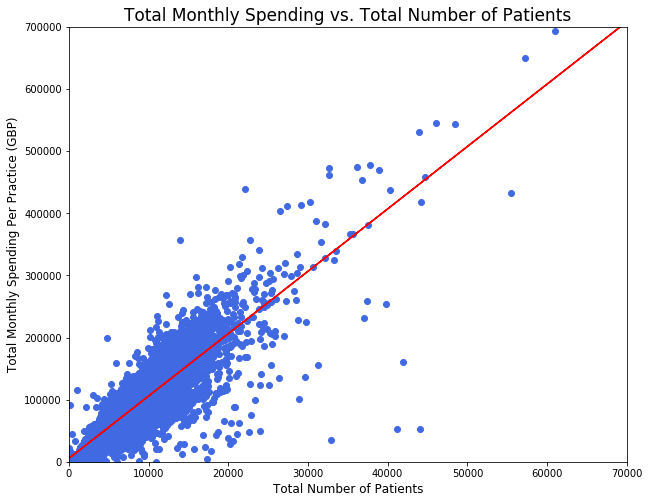

In [24]:
plot = plt.figure(figsize=(10,8))
Scatterplot = plot.add_subplot(111) 
x = CostPerPatient['Number of Patients']
y = CostPerPatient['Total Cost']
Scatterplot.scatter(x,y, color = 'royalblue')
fit = np.polyfit(x, y, deg=1)
Scatterplot.plot(x, fit[0] * x + fit[1], color= 'red')
Scatterplot.set_title('Total Monthly Spending vs. Total Number of Patients', fontsize=17)
Scatterplot.set_xlabel('Total Number of Patients', fontsize=12)
Scatterplot.set_ylabel('Total Monthly Spending Per Practice (GBP)', fontsize=12)
Scatterplot.set_xlim(0, 70000)
Scatterplot.set_ylim(0,700000)
plt.show()

Based on the scatter plot, there seems to be a positive association between the total monthly spending per practice and the number of patients registered at the GP practice. After fitting a trend line, this same positive association can still be observed. 

With a fitted linear trend line, the total monthly spending per practice can be predicted for the subsequent months, so that spending can be better managed.

Maximum and minimum values for the X and Y-axes were modified as well, so as to achieve more effective use of the space in the scatterplot such that the data points and trend line can be better presented. 

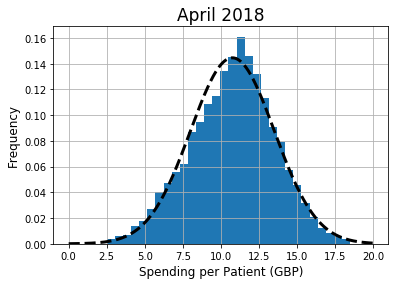

In [54]:
Plot_CostPerPatient = CostPerPatient
CostPerPatient['Cost Per Patient'] = CostPerPatient['Total Cost'] / CostPerPatient['Number of Patients']
quantile_01 = Plot_CostPerPatient['Cost Per Patient'].quantile(.01)
quantile_99 = Plot_CostPerPatient['Cost Per Patient'].quantile(.99)
pltrange = Plot_CostPerPatient[(Plot_CostPerPatient['Cost Per Patient'].values <= quantile_99) & (Plot_CostPerPatient['Cost Per Patient'].values >= quantile_01)]['Cost Per Patient']
plt.hist(pltrange, bins=30, density= True)
xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(pltrange))
m, s = norm.fit(pltrange)
pdf_g = norm.pdf(lnspc, m, s) 
plt.plot(lnspc, pdf_g, 'y--', linewidth=3, label='Norm', color='black')
plt.title('April 2018', fontsize=17)
plt.xlabel('Spending per Patient (GBP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

To calculate the cost per patient, the monthly total spending of each practice was divided by the total number of patients registered in each practice. 

To obtain the histogram of the average spending per patient, only the 1st to 99th quantiles were considered. This was to exclude extreme values which could be possible outliers, where the data could have been coded incorrectly. These outliers were removed so that the true statistical pattern would not be distorted and the resulting conclusion will not be affected.

Since average spending per patient is a continuous outcome variable, the data can be well illustrated with the use of a histogram. Upon inspection of the histogram, it can be observed that the distribution of the average spending per patient across GP practices in England has a slight positive kurtosis, but otherwise models the Gaussian normal distribution quite closely. Where areas of the histogram exceed the normal distribution curve in height, further analysis of these histogram bins can be done to examine the reason for the higher numbers of patients with these observed levels of spending. For instance, the frequency of patients with a spending of £11.25 was observed to be slightly above 0.16. However, as indicated by the Gaussian normal curve, the frequency should be approximately 0.14. Thus, through such analysis, the NHS can review the possible reasons and make necessary adjustments to reduce the number of patients in these spending categories so that the distribution models the normal curve more accurately in future. 

While the histogram allows the reader to get an idea of the overall distribution of the average spending per patient, grid lines were also included for ease of interpreting the absolute frequency values for each level of spending (if required) more easily.

## Assignment B

For Assignment B, information from the following datasets obtained from the WHO Mortality Database will be used:
1. Mortality, ICD-10 (part 1/2)
2. Mortality, ICD-10 (part 2/2)
3. Country Codes
4. Population and Live Births

#### Exploring Data Sets

These 4 data files will be imported as Data Frames as shown below:

1. Mortality, ICD-10 (part 1/2)

In [22]:
# To import 'Mortality ICD-10 (part 1/2) Data File'
MortalityPart1 = pd.read_csv('/Users/Desktop/DMHR/WHODataset/Morticd10_part1.csv', header=0, index_col=False, dtype={'SubDiv': str, 'List': str})

2. Mortality, ICD-10 (part 2/2)

In [23]:
# To import 'Mortality ICD-10 (part 2/2) Data File'
MortalityPart2 = pd.read_csv('/Users/Desktop/DMHR/WHODataset/Morticd10_part2.csv', header=0, index_col=False, dtype={'SubDiv': str, 'List': str})

3. Country Codes

In [24]:
# To import 'Country Codes Data File'
CountryCodes = pd.read_csv('/Users/Desktop/DMHR/WHODataset/CountryCodess.csv', header=0, index_col=False)
CountryCodes.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [26]:
CountryCodes.count()

country    227
name       227
dtype: int64

4. Population and Live Births

In [27]:
# To import 'Population and Live Births Data File'
aPopulation_Y2010 = Population[Population['Year'] == 2010].copy(deep=True)
Population_Y2010.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
86,1125,NaN,NaN,2010,1,4,40250440.0,1219070.0,3063246.0,NaN,...,971087.0,692772.0,434889.0,407699.0,NaN,NaN,NaN,NaN,0.0,1219070.0
87,1125,NaN,NaN,2010,2,4,38477889.0,1163338.0,2908480.0,NaN,...,871006.0,597495.0,418810.0,391919.0,NaN,NaN,NaN,NaN,0.0,1163338.0
212,1300,NaN,NaN,2010,1,1,612981.0,7265.0,7453.0,7877.0,...,22906.0,14357.0,10138.0,6397.0,4023.0,2088.0,NaN,NaN,0.0,7208.0
213,1300,NaN,NaN,2010,2,1,630103.0,7137.0,7460.0,7779.0,...,26101.0,17808.0,13826.0,9703.0,6886.0,4880.0,NaN,NaN,0.0,7083.0
240,1365,NaN,NaN,2010,1,1,18711.0,372.0,404.0,399.0,...,544.0,482.0,359.0,213.0,97.0,62.0,NaN,NaN,0.0,359.0


To select for 2010 Mortality information:

In [29]:
# First,'Mortality ICD-10 (part 1/2)' and 'Mortality ICD-10 (part 1/2)' data sets have to be combined
MortalityCombined = MortalityPart1.append(MortalityPart2)
MortalityY2010 = MortalityCombined[MortalityCombined['Year'] == 2010].copy(deep=True)
MortalityY2010.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
995,1400,NaN,NaN,2010,101,1000,1,7,1,363,...,108.0,NaN,NaN,NaN,NaN,0.0,2.0,3.0,3.0,4.0
996,1400,NaN,NaN,2010,101,1000,2,7,1,301,...,169.0,NaN,NaN,NaN,NaN,0.0,2.0,6.0,1.0,0.0
997,1400,NaN,NaN,2010,101,1001,1,7,1,23,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
998,1400,NaN,NaN,2010,101,1001,2,7,1,29,...,19.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
999,1400,NaN,NaN,2010,101,1002,1,7,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


### Question 1

#### Iceland

In [30]:
Country_Iceland = CountryCodes[CountryCodes['name'] == 'Iceland']['country'].item()
IcelandPopulation = Population_Y2010[Population_Y2010['Country'] == Country_Iceland]['Pop1'].sum().astype(int)
print('Iceland had a population of %s in 2010.' % IcelandPopulation)

Iceland had a population of 318041 in 2010.


In [31]:
IcelandDeaths = MortalityY2010[MortalityY2010['Country'] == Country_Iceland]['Deaths1'].sum()
print('Iceland had a total of %s deaths in 2010.' % IcelandDeaths)

Iceland had a total of 4038 deaths in 2010.


#### Italy

In [32]:
Country_Italy = CountryCodes[CountryCodes['name'] == 'Italy']['country'].item()
ItalyPopulation = Population_Y2010[Population_Y2010['Country'] == Country_Italy]['Pop1'].sum().astype(int)
print('Italy had a population of %s in 2010.' % ItalyPopulation)

Italy had a population of 60483386 in 2010.


In [33]:
ItalyDeaths = MortalityY2010[MortalityY2010['Country'] == Country_Italy]['Deaths1'].sum()
print('Italy had a total of %s deaths in 2010.' % ItalyDeaths)

Italy had a total of 1169230 deaths in 2010.


#### New Zealand

In [34]:
Country_NewZealand = CountryCodes[CountryCodes['name'] == 'New Zealand']['country'].item()
NewZealandPopulation = Population_Y2010[Population_Y2010['Country'] == Country_NewZealand]['Pop1'].sum().astype(int)
print('New Zealand had a population of %s in 2010.' % NewZealandPopulation)

New Zealand had a population of 4367360 in 2010.


In [35]:
NewZealandDeaths = MortalityY2010[MortalityY2010['Country'] == Country_NewZealand]['Deaths1'].sum()
print('New Zealand had a total of %s deaths in 2010.' % NewZealandDeaths)

New Zealand had a total of 57298 deaths in 2010.


In 2010, Iceland’s population size was 318,041, with a total of 4,038 deaths observed. In the same time period, Italy’s population size was 60,483,386, with 1,169,230 deaths observed, while New Zealand’s population size was 4,367,360, with 57,298 deaths. Based on this information, Iceland had the lowest death count as a percentage of its total population in 2010 (1.27% vs 1.31% in New Zealand and 1.93% in Italy).

### Question 2

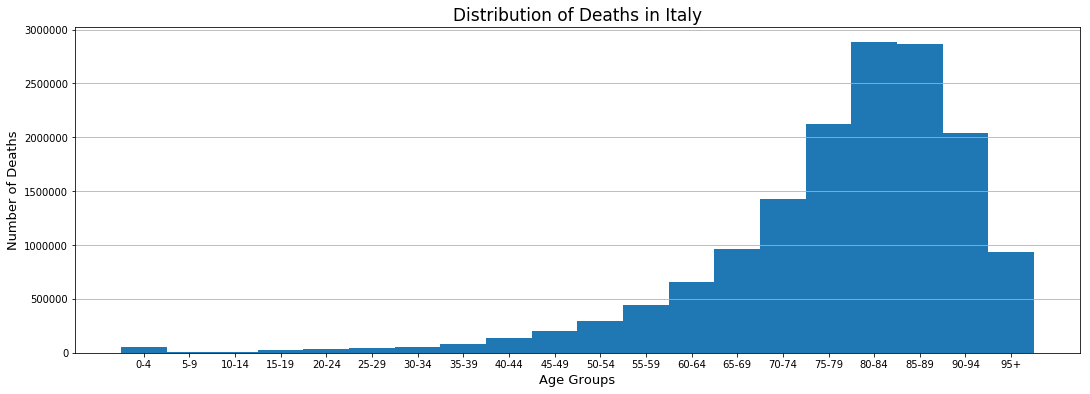

In [37]:
ItalyMortality = MortalityCombined[MortalityCombined['Country'] == 4180].copy(deep=True)
ItalyMortality['Deaths2 to Deaths6'] = ItalyMortality['Deaths2'] + ItalyMortality['Deaths3'] + ItalyMortality['Deaths4'] + ItalyMortality['Deaths5'] + ItalyMortality['Deaths6']
ItalyMortality.loc['Total_deaths'] = ItalyMortality.sum(axis=0, numeric_only=True)
Bins = list(range(0, 100, 5))
Ht = [ItalyMortality.loc['Total_deaths', 'Deaths2 to Deaths6']]
Ht.extend(list(ItalyMortality.iloc[-1, 15:-6]))
Labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
FigQ2 = plt.figure(figsize=(18, 6))
PlotQ2 = FigQ2.add_subplot(111)
PlotQ2.bar(Bins, Ht, tick_label=Labels, width=5.0)
plt.title('Distribution of Deaths in Italy', fontsize=17)
plt.xlabel('Age Groups', fontsize=13)
plt.ylabel('Number of Deaths', fontsize=13)
plt.grid(axis='y')
plt.show()

Typically, a histogram takes continuous data and separates them by bins. However, as the data for this question was provided in the form of specified categories by age groups, these bins have been pre-defined, and the histogram will present the distribution of deaths (for all causes) in Italy by age group.

The number of deaths observed for 0, 1, 2, 3 and 4 years of age were summed up into one age category (‘0 – 4’), so as to obtain a histogram with bins that have a 4-year interval. From the histogram, it can be observed that the number of deaths observed for the age group 0-4 was quite substantial as compared to the age groups of 5-9 and 10-14. This could be due to the fact that toddlers aged between 0-4 years old do not have fully developed immune systems, and are therefore more susceptible to death due to illnesses or other medical conditions.

In the histogram, titles and axes labels were added to give the reader a brief context of the information illustrated in the histogram, and horizontal grid lines were also provided for the ease of determining the total number of deaths observed for each age group. 

### Question 3

#### Table - Cause of death, Number of deaths, Proportion of overall deaths

In [38]:
ItalyNeoplasmCases = ItalyMortality[['Cause', 'Deaths1']].query("Cause >= 'C00' and Cause < 'D49'")
ItalyNeoplasm = pd.DataFrame(ItalyNeoplasmCases.groupby(ItalyNeoplasmCases.Cause).apply(lambda F4: F4['Deaths1'].sum()))
ItalyNeoplasm.columns = ['Deaths']
ItalyNeoplasm.reset_index(inplace=True)
ItalyNeoplasm['Deaths'] = ItalyNeoplasm.Deaths.astype(int)
ItalyNeoplasm_TotalDeaths = ItalyNeoplasm['Deaths'].sum()
ItalyNeoplasm['Proportion_of_Overall_Deaths'] = ItalyNeoplasm['Deaths'] / ItalyNeoplasm_TotalDeaths
ItalyNeoplasm_Top5 = ItalyNeoplasm.sort_values(by=['Proportion_of_Overall_Deaths'], ascending=False).iloc[:5, ]
ItalyNeoplasm_Top5.reset_index(inplace=True, drop=True)
ItalyNeoplasm_Top5

,Cause,Deaths,Proportion_of_Overall_Deaths
0,C349,426451,0.189647
1,C509,155895,0.069328
2,C189,143188,0.063677
3,C169,125679,0.055891
4,C259,120070,0.053396


As can be seen from the table, the top 5 most fatal neoplasms in Italy were C349, C509, C189, C169 and C259. These codes can be translated as follows:

- C34.9 – Malignant Neoplasm: Bronchus or lung, unspecified

- C50.9 – Malignant Neoplasm: Breast, unspecified

- C18.9 – Malignant Neoplasm: Colon, unspecified

- C16.9 – Malignant Neoplasm: Stomach, unspecified

- C25.9 – Malignant Neoplasm: Pancreas, unspecified

Due to the limited number of terms within each block of the ICD-10, medical conditions that do not fall under the description of the first 8 terms of a block get classified under the ninth term, ‘unspecified’. As observed in the table, it is worth noting that the top 5 most fatal neoplasms in Italy were all ‘unspecified’ forms of the malignant neoplasm. This could be because the “unspecified” term of each block takes into account all types of cancer that cannot be properly classified under the any of the first 8 terms, and thus more cases of neoplasm were classified under 'unspecified' for convenience during the clinical coding process.

#### Pie Chart to visualize the proportion of deaths

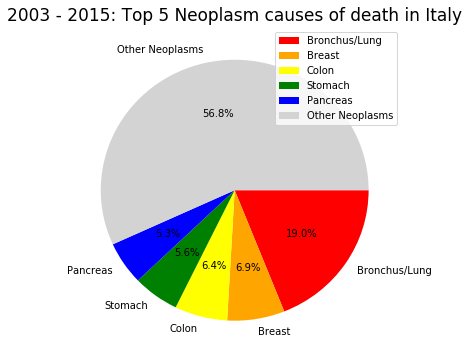

In [39]:
OtherNeoplasms= ItalyNeoplasm.Deaths.sum() - ItalyNeoplasm_Top5.Deaths.sum()
OtherNeoplasms_Percent = 1 - ItalyNeoplasm_Top5.Proportion_of_Overall_Deaths.sum()
ItalyNeoplasm_Top5.loc[5] = ['Other Neoplasms', OtherNeoplasms, OtherNeoplasms_Percent]
Neoplasm = ['Bronchus/Lung', 'Breast', 'Colon', 'Stomach', 'Pancreas', 'Other Neoplasms']
Colours = ['red', 'orange', 'yellow', 'green', 'blue', 'lightgrey']
FigQ3 = plt.figure(figsize=(6,6))
PlotQ3 = FigQ3.add_subplot(111)
PlotQ3.pie(ItalyNeoplasm_Top5['Proportion_of_Overall_Deaths'], labels=Neoplasm, colors=Colours, counterclock=False, autopct="%1.1f%%")
plt.title('2003 - 2015: Top 5 Neoplasm causes of death in Italy', fontsize=17)
plt.legend()
plt.show()

A pie chart was used to more effectively visualize the top 5 most fatal neoplasms in Italy, based on data gathered from 2003 to 2015. Distinct colours were used so that the different types of neoplasms could be distinguished easily. The ‘Other Neoplasms’ segment was represented in light grey so as to allow the other 5 colours to stand out more in comparison. The purpose of this was to not give unnecessary weight to the data (‘Other Neoplasms’), since the main aim of this illustration is to highlight the top 5 most fatal neoplasms in Italy.

Percentages were also displayed for each type of neoplasm next to their respective segments, with the cause of death (in ICD10 codes) translated into the types of neoplasm in layman terms. This was to ensure the ease of interpretation of data for non-medically trained personnel or the general population. A legend for the pie chart was also provided along with labels next to each segment, so as to provide greater convenience to the user when using the data.

### Question 4

In [40]:
Country_Australia = CountryCodes[CountryCodes['name'] == 'Australia']['country'].item()
AustraliaMortality_Y2010 = MortalityY2010[MortalityY2010['Country'] == Country_Australia].copy(deep=True)
AustraliaNeoplasmCases_Y2010 = AustraliaMortality_Y2010.query("Cause >= 'C00' and Cause < 'D49'").drop(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Sex', 'Frmat', 'IM_Frmat'], axis=1)
AustraliaNeoplasm_Y2010 = pd.DataFrame(AustraliaNeoplasmCases_Y2010.groupby(AustraliaNeoplasmCases_Y2010.Cause, as_index=False).sum())
AustraliaNeoplasm_Y2010.loc['Total_deaths'] = AustraliaNeoplasm_Y2010.sum(axis=0, numeric_only=True)
AustraliaTopAgeGroups = AustraliaNeoplasm_Y2010.sort_values(by='Total_deaths', axis=1, ascending=False).iloc[-1, :6]
Australia_Top5AgeGroups = AustraliaTopAgeGroups.iloc[1:6]
Australia_Top5AgeGroups

Deaths22    7167
Deaths21    6291
Deaths20    5713
Deaths23    5520
Deaths19    4768
Name: Total_deaths, dtype: object

Since the dataset obtained from the WHO mortality database contained many columns that were not useful in the analysis for this question, those columns were dropped so that the relevant columns of information could be more easily analysed. 

As observed, the top 5 age groups in Australia with a Neoplasm cause of death were Deaths22, Deaths 21, Deaths20, Deaths23 and Deaths19. These column headings translate into the age categories of 80-84 (Deaths22), 75-79 (Deaths21), 70-74 (Deaths20), 85-89 (Deaths23) and 65-69 (Deaths19) respectively. 

These results suggest that more elderly people (aged 65 and above) die from cancer as compared to people of younger age groups. This is consistent with the theory that cancers take years to develop and thus the incidence of neoplasms among the elderly would mostly likely be higher than in younger people. Therefore, it is reasonable that the elderly age groups make up the top 5 age groups dying with a neoplasm cause of death.

### Question 5

#### Population (Italy vs. Australia)

In [41]:
Country_Italy = CountryCodes[CountryCodes['name'] == 'Italy']['country'].item()
ItalyPopulation_Y2010 = Population_Y2010[Population_Y2010['Country'] == Country_Italy].copy(deep=True)
ItalyPopulation = ItalyPopulation_Y2010['Pop1'].sum().astype(int)
print('Italy had a population of %s in 2010.' % ItalyPopulation)

Country_Australia = CountryCodes[CountryCodes['name'] == 'Australia']['country'].item()
AustraliaPopulation_Y2010 = Population_Y2010[Population_Y2010['Country'] == Country_Australia].copy(deep=True)
AustraliaPopulation = AustraliaPopulation_Y2010['Pop1'].sum().astype(int)
print('Australia had a population of %s in 2010.' % AustraliaPopulation)

Italy had a population of 60483386 in 2010.
Australia had a population of 22297515 in 2010.


#### Mortality (Italy vs. Australia)

In [42]:
ItalyMortality_Y2010 = MortalityY2010[MortalityY2010['Country'] == Country_Italy].copy(deep=True)
ItalyMortality = ItalyMortality_Y2010['Deaths1'].sum()
print('Italy experienced a total of %s deaths in 2010.' % ItalyMortality)

AustraliaMortality = AustraliaMortality_Y2010["Deaths1"].sum()
print('Australia experienced a total of %s deaths in 2010.' % AustraliaMortality)

Italy experienced a total of 1169230 deaths in 2010.
Australia experienced a total of 286946 deaths in 2010.


#### Mortality due to Neoplasms (Italy vs. Australia)

In [44]:
Country_Italy = CountryCodes[CountryCodes['name'] == 'Italy']['country'].item()
ItalyMortality_Y2010 = MortalityY2010[MortalityY2010['Country'] == Country_Italy].copy(deep=True)
ItalyNeoplasmCases_Y2010 = ItalyMortality_Y2010.query("Cause >= 'C00' and Cause < 'D49'").drop(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Sex', 'Frmat', 'IM_Frmat'], axis=1)
ItalyNeoplasm_Y2010 = pd.DataFrame(ItalyNeoplasmCases_Y2010.groupby(ItalyNeoplasmCases_Y2010.Cause, as_index=False).sum())
ItalyNeoplasm_Y2010.loc['Total_deaths'] = ItalyNeoplasm_Y2010.sum(axis=0, numeric_only=True)
ItalyNeoplasmMortality = ItalyNeoplasm_Y2010.loc['Total_deaths', 'Deaths1'].astype(int)
print('%s of the total deaths experienced in Italy in 2010 were due to Neoplasms.' % ItalyNeoplasmMortality)

AustraliaNeoplasmMortality = AustraliaNeoplasm_Y2010.loc['Total_deaths', 'Deaths1'].astype(int)
print('%s of the total deaths experienced in Australia in 2010 were due to Neoplasms.' % AustraliaNeoplasmMortality)

175046 of the total deaths experienced in Italy in 2010 were due to Neoplasms.
43316 of the total deaths experienced in Australia in 2010 were due to Neoplasms.


In 2010, 175,046 (15.0%) of the 1,169,230 deaths in Italy, and 43,316 (15.1%) of the 286,946 deaths in Australia were due to Neoplasm.

#### Top 5 Age Groups with the Highest Death Counts due to Neoplasm (Italy vs. Australia)

In [45]:
Country_Italy = CountryCodes[CountryCodes['name'] == 'Italy']['country'].item()
ItalyMortality_Y2010 = MortalityY2010[MortalityY2010['Country'] == Country_Italy].copy(deep=True)
ItalyNeoplasmCases_Y2010 = ItalyMortality_Y2010.query("Cause >= 'C00' and Cause < 'D49'").drop(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Sex', 'Frmat', 'IM_Frmat'], axis=1)
ItalyNeoplasm_Y2010 = pd.DataFrame(ItalyNeoplasmCases_Y2010.groupby(ItalyNeoplasmCases_Y2010.Cause, as_index=False).sum())
ItalyNeoplasm_Y2010.loc['Total_deaths'] = ItalyNeoplasm_Y2010.sum(axis=0, numeric_only=True)
ItalyTopAgeGroups = ItalyNeoplasm_Y2010.sort_values(by='Total_deaths', axis=1, ascending=False).iloc[-1, :6]
Italy_Top5AgeGroups = ItalyTopAgeGroups.iloc[1:6]
Italy_Top5AgeGroups

Deaths22    31509
Deaths21    29884
Deaths20    25258
Deaths23    23794
Deaths19    17890
Name: Total_deaths, dtype: object

In [46]:
Country_Australia = CountryCodes[CountryCodes['name'] == 'Australia']['country'].item()
AustraliaMortality_Y2010 = MortalityY2010[MortalityY2010['Country'] == Country_Australia].copy(deep=True)
AustraliaNeoplasmCases_Y2010 = AustraliaMortality_Y2010.query("Cause >= 'C00' and Cause < 'D49'").drop(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Sex', 'Frmat', 'IM_Frmat'], axis=1)
AustraliaNeoplasm_Y2010 = pd.DataFrame(AustraliaNeoplasmCases_Y2010.groupby(AustraliaNeoplasmCases_Y2010.Cause, as_index=False).sum())
AustraliaNeoplasm_Y2010.loc['Total_deaths'] = AustraliaNeoplasm_Y2010.sum(axis=0, numeric_only=True)
AustraliaTopAgeGroups = AustraliaNeoplasm_Y2010.sort_values(by='Total_deaths', axis=1, ascending=False).iloc[-1, :6]
Australia_Top5AgeGroups = AustraliaTopAgeGroups.iloc[1:6]
Australia_Top5AgeGroups

Deaths22    7167
Deaths21    6291
Deaths20    5713
Deaths23    5520
Deaths19    4768
Name: Total_deaths, dtype: object

From the results, it can be observed that the 'Top 5 Age Groups with the Highest Death Counts due to Neoplasm' for Italy and Australia are exactly the same, with the highest age category being 80-84 (Deaths22), followed by 75-79 (Deaths21), 70-74 (Deaths20), 85-89 (Deaths23), and lastly 65-69 (Deaths19); in the same order.

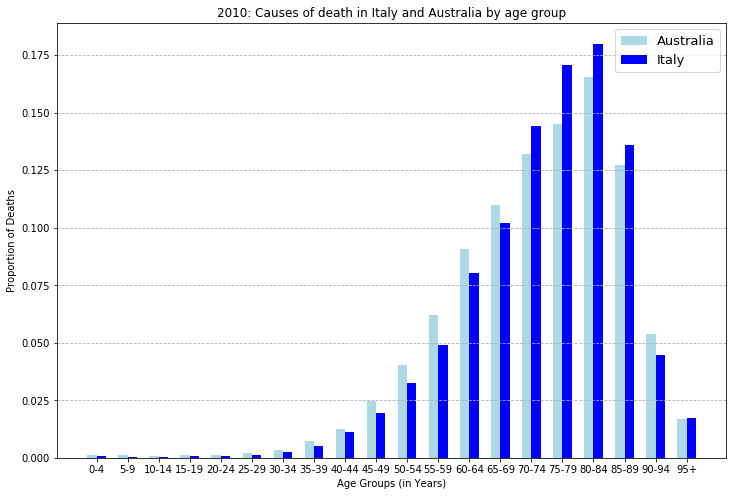

In [73]:
AustraliaNeoplasm_Y2010["Deaths2 to 6"] = AustraliaNeoplasm_Y2010["Deaths2"] + AustraliaNeoplasm_Y2010["Deaths3"] + AustraliaNeoplasm_Y2010["Deaths4"] + AustraliaNeoplasm_Y2010["Deaths5"] + AustraliaNeoplasm_Y2010["Deaths6"]
ItalyNeoplasm_Y2010["Deaths2 to 6"] = ItalyNeoplasm_Y2010["Deaths2"] + ItalyNeoplasm_Y2010["Deaths3"] + ItalyNeoplasm_Y2010["Deaths4"] + ItalyNeoplasm_Y2010["Deaths5"] + ItalyNeoplasm_Y2010["Deaths6"]
height2_Australia = [AustraliaNeoplasm_Y2010.loc["Total_deaths", "Deaths2 to 6"]]
height2_Australia.extend(list(AustraliaNeoplasm_Y2010.iloc[-1, 7:26]))
height2_Italy = [ItalyNeoplasm_Y2010.loc["Total_deaths", "Deaths2 to 6"]]
height2_Italy.extend(list(ItalyNeoplasm_Y2010.iloc[-1, 7:26]))
tick_label = ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95+"]
ChartQ5, P = plt.subplots(figsize=(12,8))
Bins = np.arange(20)
AustraliaPlot = P.bar(Bins, height2_Australia / AustraliaNeoplasmMortality, 0.3, color="lightblue")
ItalyPlot = P.bar(Bins + 0.3, height2_Italy / ItalyNeoplasmMortality, 0.3, color="blue")
P.set_xticklabels(tick_label)
plt.title("2010: Causes of death in Italy and Australia by age group")
plt.xticks(Bins + 0.3 / 2)
plt.xlabel("Age Groups (in Years)")
plt.ylabel("Proportion of Deaths")
plt.legend((AustraliaPlot[0], ItalyPlot[0]), ("Australia", "Italy"), fontsize=13)
plt.grid(axis="y", linestyle="--")
plt.show()

For the purpose of comparing deaths in Australia and Italy, a bar chart with information of the 2 countries were also presented in one plot instead of 2 separate bar charts. This was to juxtapose the death rates in each country, for ease of comparing the death rates between the two countries by age group. With a bar chart, an overall trend of deaths due to neoplasm experienced in each country can also be deduced easily. 

In the bar chart, a horizontal grid line was also added to allow for easy deduction of the absolute proportion of deaths due to neoplasm for each age category, for the country of interest (Italy or Australia). Distinct colours were also used to distinguish between the 2 countries clearly, which is important so as not to misdirect the reader, especially in cases where both bars for the same age category were of similar heights. This can make things easier for users of these visual representations. 

From the bar chart, it is evident that Australia has a higher proportion of deaths due to neoplasm across most age groups as compared to Italy, with the exception of the age groups between 70-89, and above 95 years old. For comparison of death rates between the two countries, a proportion of deaths was calculated and plotted as the dependent variable. This was done because Italy and Australia have different population sizes, and thus comparing absolute number of deaths would not serve as a fair basis for comparison.